<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_4/M_MPlain_grande.png" height="300" width="300"> 


# <center> R для тервера и матстата. <br>  <br> Домашка номер три! </center>

Данный ноутбук является домашкой по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2019). Автор ноутбука [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/R_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

----------------------

Приветствую вас внутри третьей домашки.

In [1]:
library('maxLik') # пакет для метода макс. правдоподобия
library('dplyr')  # пакет для работы с таблицами 

library("ggplot2")  # Пакет для красивых графиков 
library("grid")     # Пакет для субплотов

# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=4, repr.plot.height=3)

Loading required package: miscTools

Please cite the 'maxLik' package as:
Henningsen, Arne and Toomet, Ott (2011). maxLik: A package for maximum likelihood estimation in R. Computational Statistics 26(3), 443-458. DOI 10.1007/s00180-010-0217-1.

If you have questions, suggestions, or comments regarding the 'maxLik' package, please use a forum or 'tracker' at maxLik's R-Forge site:
https://r-forge.r-project.org/projects/maxlik/

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Задачка 1

Александр раздобыл два золотых слитка массой $m$ каждый. Также он раздобыл весы, которые работают с некоторой погрешностью. Сначала Саша положил на весы первый золотой слиток и получил в результате взвешивания $m + \varepsilon_1$, где $ \varepsilon_1$ - случайная величина, ошибка первого взвешивания. Затем Саша положил на весы сразу оба слитка и получил в результате взвешивания $2m + \varepsilon_2$, где $ \varepsilon_2$ - случайная величина, ошибка второго взвешивания. Оказалось, что $y_1 = 60$, $y_2 = 110$.

С помощью метода максимального правдоподобия оцените вес слитка $m$ и погрешность весов, $b$, если ошибки не зависят друг от друга и 

a)  $\varepsilon_i \sim U[-b,b]$

b)  $\varepsilon_i \sim N(0,b^2)$

Сначала решите задачу ручками, а затем в R. 

c) Постройте на компьютере для обоих случаев $95\%$ доверительный интервал для параметров $b$ и $m$.

Матрицу Гессе для оценки дисперсий оценок параметров тоже нужно найти руками. При поиске доверительного интервала можно воспользоваться готовой оценкой матрицы из пакета. 

In [ ]:
# ваши записи на бумажках и коды :3 

## Задачка 2

В [табличке](https://yadi.sk/i/hDxMJ0fw3VSDmu) лежит информация о стоимости квартир в Москве и о основных параметрах этих квартир. Пусть цена на квартиры имеет логарифмически нормальное распределение. Оцените параметры $\mu$ и $\sigma$ методом максимального правдоподобия. Постройте для оценок доверительные интервалы. 

## Задачка 3 



## Задачка 3

a) Cгенерируйте выборку из распределения $U[0; a]$. Возмите в качестве $a$ своё любимое число. Найдите руками оценку максимального правдоподобия для параметра $a$. После найдите её с помощью R. Насколько то, что вы получили соответствует вашим ожиданиям? Почему всё произошло именно так?


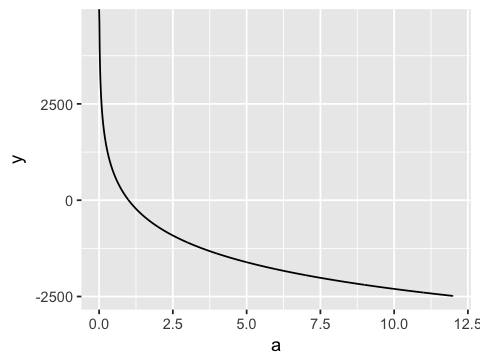

In [51]:
X <- runif(1000, min=1, max=4)

lnL <- function(a, X){
    ans <- -length(X)*log(a)
    return(ans)
}

a <- seq(0, 12, by = 0.01)
y <- lnL(a[1:length(a)], X)
qplot(a, y, geom='line')

b) Сгенерируйте выборку из распределения $U[1-\theta; 1+\theta]$. В качестве $\theta$ возьмите любимое число сына маминой подруги. Найдите оценку для $\theta$ руками. После найдите её с помощью R. Насколько то, что вы получили, соответствует вашим ожиданиям? Почему всё произошло именно так? 

In [ ]:
# Ваш код здесь

с) Являются ли оценки, которые вы получили для пунктов a) и b) состоятельными и несмещёнными? 

In [ ]:
# Ваш код, если это необходимо :) 

d) Какая из оценок лучше? Почему? Какая оценка обладает в пределе меньшей дисперсией? 

In [ ]:
# Вопрос поставлен некоректно. Просят сравнить между собой оценки для разных параметров. 
# Никто мне про этот косяк не сказал, значит либо вы балбесы, либо никто не делал :(

## Задачка 4

Каждый из группы второкурсников, пришедшей на пару подкинул монетку два раза и никому не рассказывал, что у него выпало. В зависимости от того, что выпало на монетках, а также от того пробовал ли человек наркотики или нет, он сказал одну из двух фраз: болото или феечка Винкс.


|           |был хотя бы один орел| не было ни одного орла|
|-----------|---------------------|-----------------------|
|пробовал   |   болото            | феечка Винкс          |
|не пробовал|  феечка Винкс       |      болото           |


Ответы распределились следующим образом: 

Болото сказали 10 человек, феечка Винкс сказали 4 человека.

a) Оцените методом максимального правдоподобия долю второкурсников, пробовавших наркотики. 

b) Найдите $\hat{Var}(\hat p)$.

c) Постройте $80\%$ доверительный интервал для доли пробовавших наркотики. 

In [ ]:
# Ваш код

## Задачка 5

В группе [мемы про машинное обучение для взрослых мужиков](https://vk.com/weirdkerneltricks) постят мемы про машинное обучение для взрослых мужиков. Взрослые мужики смотрят мемы про машинное обучение, лайкают их, комментируют и репостят. В итоге рождается [табличка со статистикой.](https://yadi.sk/i/D9prr_lu3VRywS) 

Предположим, что просмотры, лайки, число комментариев и репосты имеют распределение Пуассона, $X_i \sim Poiss(\lambda)$. Также будем предполагать, что число лайков (и других показателей) на текущем посте не зависит от числа лайков на других постах.

a) Оцените методом максимального правдоподобия параметр $\lambda$ для каждой из четырёх случайных величин. Проинтерпретируйте полученые оценки. 

b) Постройте для всех четырёх ситуаций доверительные интервалы для параметра $\lambda$. Почему для одних случайных величин он получился более узким, а для других более широким? 

с) Сколько лайков, репостов, комментариев и просмотров окажется под следующим постом? Постройте для своего прогноза $95\%$ доверительный интервал. 

In [3]:
df = read.csv('/Users/fulyankin/Yandex.Disk.localized/R/R_prob_data//memes_likes.csv', sep=';') 
d<-df$comments 
d[1:10]

[1] 4 9 0 0 0 0 4 0 0 3

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


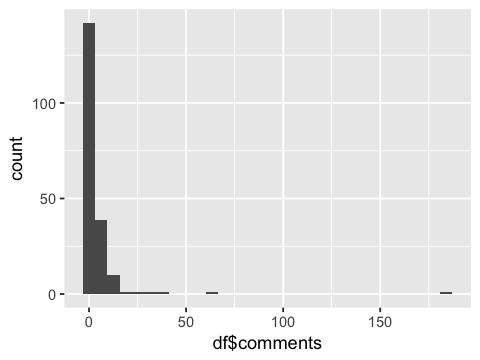

In [23]:
qplot(df$comments)

In [28]:
log_lik <- function(Lambda,data) { 
    n <- length(data) 
    result <- -Lambda*n + sum(data) * log(Lambda)
    return(result) 
} 

log_lik(7, c(1,2,3))

result <- maxLik(log_lik, start=5,data=d)
summary(result)

[1] -9.324539

--------------------------------------------
Maximum Likelihood estimation
Newton-Raphson maximisation, 4 iterations
Return code 1: gradient close to zero
Log-Likelihood: 359.415 
1  free parameters
Estimates:
     Estimate Std. error t value Pr(> t)    
[1,]   4.1980     0.1456   28.84  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
--------------------------------------------

--------------------------------------------
Maximum Likelihood estimation
Newton-Raphson maximisation, 4 iterations
Return code 1: gradient close to zero
Log-Likelihood: 359.415 
1  free parameters
Estimates:
     Estimate Std. error t value Pr(> t)    
[1,]   4.1980     0.1456   28.84  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
--------------------------------------------

In [27]:
res <- nlm(log_lik, 2, hessian=TRUE, d) 
res$estimate
mean(d)

[1] 4.197968

[1] 4.19797

In [ ]:
# минимизируем минус правдоподобие <=> максимизируем правдоподобие
res <- nlm(lnL,c(1/3,1/3),
            hessian=TRUE,
            X=c(x1,x2),n)

[1] 4.19797

In [ ]:
# Ваш код

## Задачка 7

В этой задачке есть всё. Пусть $X_1, \ldots, X_n$ независимые случайные величины с плотностью распределения 

$$
f_X(x) = \begin{cases} (a+1) \cdot x^a, \quad x \in [0;1] \\ 0, \text{ иначе} \end{cases}
$$

a) Найдите руками для параметра $a$ оценку методом моментов. Найдите оценку методом максимального правдоподобия. 

b) Найдите асимптотические распределения этих оценок. 

с) Постройте на основе этих распределений $95\%$ доверительные интервалы. Для какой оценки доверительный интервал оказался короче? 

d) Какая из оценок является асимптотически более крутой? Для ответа на этот вопрос найдите $$\lim_{n \to \infty} \frac{\hat Var(\hat a_{ML})}{\hat Var(\hat a_{MM})}.$$

e) Сгенерируйте в R выборку объёма $100$ из этого распределения. Постройте оценки, а также доверительные интервалы для них. Правда ли, что результаты, полученные в пунктах с) и d) верны для этой выборки? 

In [ ]:
# Ваш код здесь